In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Load the dataset
df = pd.read_csv("Datasets/reviews_cleaned.csv")
df = df.sample(n=5000, random_state=42)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1617,538578,B000SDIO3E,A1AOJWSJPONPX7,"Maric,Maric",0.0,0.0,5.0,1.292458e+09,Love it,Lavazza has some of the smoothest expresso bea...,positive,1.0,23.0
8128,280809,B0017I1QAW,A1RT5A6U67HGYA,bipolypesca,6.0,6.0,5.0,1.311725e+09,Perfect.,"Boy, does it make me sad to see so many people...",positive,1.0,556.0
2168,363834,B001M08YZA,A2XFDJI4EXPV3Q,Ellenj,0.0,0.0,3.0,1.347840e+09,"If it's not broken, don't fix it!","Kellogg's Special K Cereal, Protein Plus, was ...",neutral,0.0,87.0
1090,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4.0,4.0,4.0,1.322611e+09,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1.0,758.0
7754,63985,B004IXYLJ6,A1XIHSYCXMQCSI,"R. Robin ""Thanks 2 God!""",0.0,0.0,5.0,1.344902e+09,Exceptional Chocolate for a Chocolate Lover,I initally ordered this product from my niece ...,positive,1.0,172.0


In [97]:
#Information about the dataset
df.info()
#Summary statistics of the dataset
df.describe()
#returns  number of columns and rows
print(df.shape)
#check for missing values
df.isnull().sum()
#fill the empty rows
df['Summary'] = df['Summary'].fillna("No Summary")


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1617 to 7199
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      5000 non-null   object 
 1   ProductId               4992 non-null   object 
 2   UserId                  4992 non-null   object 
 3   ProfileName             4992 non-null   object 
 4   HelpfulnessNumerator    4992 non-null   float64
 5   HelpfulnessDenominator  4992 non-null   float64
 6   Score                   4992 non-null   float64
 7   Time                    4992 non-null   float64
 8   Summary                 4992 non-null   object 
 9   Text                    4992 non-null   object 
 10  Sentiment               4992 non-null   object 
 11  Sentiment_Label         4992 non-null   float64
 12  review_length           4992 non-null   float64
dtypes: float64(6), object(7)
memory usage: 546.9+ KB
(5000, 13)


In [98]:
# Check for duplicates
print(df.duplicated().sum())
#Removes duplicated rows
data_cleaned = df.drop_duplicates()


1261


In [99]:
#Handling the Outliers

#calucte the review length(Number of words in the review)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))

df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1617,538578,B000SDIO3E,A1AOJWSJPONPX7,"Maric,Maric",0.0,0.0,5.0,1.292458e+09,Love it,Lavazza has some of the smoothest expresso bea...,positive,1.0,23
8128,280809,B0017I1QAW,A1RT5A6U67HGYA,bipolypesca,6.0,6.0,5.0,1.311725e+09,Perfect.,"Boy, does it make me sad to see so many people...",positive,1.0,556
2168,363834,B001M08YZA,A2XFDJI4EXPV3Q,Ellenj,0.0,0.0,3.0,1.347840e+09,"If it's not broken, don't fix it!","Kellogg's Special K Cereal, Protein Plus, was ...",neutral,0.0,87
1090,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4.0,4.0,4.0,1.322611e+09,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1.0,758
7754,63985,B004IXYLJ6,A1XIHSYCXMQCSI,"R. Robin ""Thanks 2 God!""",0.0,0.0,5.0,1.344902e+09,Exceptional Chocolate for a Chocolate Lover,I initally ordered this product from my niece ...,positive,1.0,172


In [100]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [101]:
df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [102]:
print(df['Sentiment'].value_counts())
print(df.head())

Sentiment
positive    3943
negative     695
neutral      362
Name: count, dtype: int64
          Id   ProductId          UserId               ProfileName  \
1617  538578  B000SDIO3E  A1AOJWSJPONPX7               Maric,Maric   
8128  280809  B0017I1QAW  A1RT5A6U67HGYA               bipolypesca   
2168  363834  B001M08YZA  A2XFDJI4EXPV3Q                    Ellenj   
1090  330358  B005ATVY88   AC5UIM0EA1BNZ                    PalFam   
7754   63985  B004IXYLJ6  A1XIHSYCXMQCSI  R. Robin "Thanks 2 God!"   

      HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
1617                   0.0                     0.0    5.0  1.292458e+09   
8128                   6.0                     6.0    5.0  1.311725e+09   
2168                   0.0                     0.0    3.0  1.347840e+09   
1090                   4.0                     4.0    4.0  1.322611e+09   
7754                   0.0                     0.0    5.0  1.344902e+09   

                                         

In [103]:
# Map sentiment to numbers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)

# Reorder columns to place Sentiment_Label next to Sentiment
sentiment_col = df.pop('Sentiment_Label')
df.insert(df.columns.get_loc('Sentiment') + 1, 'Sentiment_Label', sentiment_col)

# Preview
print(df[['Sentiment', 'Sentiment_Label']].head())


     Sentiment  Sentiment_Label
1617  positive                1
8128  positive                1
2168   neutral                0
1090  positive                1
7754  positive                1


In [104]:
df.to_csv('reviews_cleaned.csv', index=False)

In [105]:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Unique values in 'Id':
Id
=======    4
363297     2
216228     2
330358     2
532006     2
          ..
61459      1
271962     1
63985      1
363834     1
280809     1
Name: count, Length: 3739, dtype: int64
--------------------------------------------------
Unique values in 'ProductId':
ProductId
B001RVFEP2    13
B007JFMH8M    12
B007Y59HVM     9
B008JKTTUA     9
B0041NYV8E     9
              ..
B000EMM9O4     1
B000ALGNHI     1
B000GG0BQ6     1
B004ACQKDK     1
B000FDDET6     1
Name: count, Length: 3008, dtype: int64
--------------------------------------------------
Unique values in 'UserId':
UserId
A29JUMRL1US6YP    7
A1YUL9PCJR3JTY    7
A2YNIKQDLZR2WW    6
A36MP37DITBU6F    5
AY12DBB0U420B     5
                 ..
A3U3CBFLW5UK8Y    1
A30JIRJQ4VJFWK    1
A2G5O30KOVQC2V    1
A1ECU9AC5YMKVD    1
A36SCABC3505KM    1
Name: count, Length: 3616, dtype: int64
--------------------------------------------------
Unique values in 'ProfileName':
ProfileName
O. Brown "Ms. O. Khannah-Brown"  

In [106]:
import string
import re  
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from num2words import num2words 




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [108]:
def clean_text(text):
    text = BeautifulSoup(str(text), "html.parser").get_text()
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)  # Convert digits to words
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the 'Text' column (adjusting the column name)
df['clean_review'] = df['Text'].apply(clean_text)

# Verify the output
print(df[['Text', 'clean_review']].head())  # Check the first few rows

                                                   Text  \
1617  Lavazza has some of the smoothest expresso bea...   
8128  Boy, does it make me sad to see so many people...   
2168  Kellogg's Special K Cereal, Protein Plus, was ...   
1090  I received Hill's Science Diet Ideal Balance D...   
7754  I initally ordered this product from my niece ...   

                                           clean_review  
1617  lavazza smoothest expresso beans know harsh st...  
8128  boy make sad see many people leaving comments ...  
2168  kelloggs special k cereal protein plus perfect...  
1090  received hills science diet ideal balance dog ...  
7754  initally ordered product niece school sale fir...  


In [109]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length,clean_review
1617,538578,B000SDIO3E,A1AOJWSJPONPX7,"Maric,Maric",0.0,0.0,5.0,1.292458e+09,Love it,Lavazza has some of the smoothest expresso bea...,positive,1,23,lavazza smoothest expresso beans know harsh st...
8128,280809,B0017I1QAW,A1RT5A6U67HGYA,bipolypesca,6.0,6.0,5.0,1.311725e+09,Perfect.,"Boy, does it make me sad to see so many people...",positive,1,556,boy make sad see many people leaving comments ...
2168,363834,B001M08YZA,A2XFDJI4EXPV3Q,Ellenj,0.0,0.0,3.0,1.347840e+09,"If it's not broken, don't fix it!","Kellogg's Special K Cereal, Protein Plus, was ...",neutral,0,87,kelloggs special k cereal protein plus perfect...
1090,330358,B005ATVY88,AC5UIM0EA1BNZ,PalFam,4.0,4.0,4.0,1.322611e+09,Good results but contains soy,I received Hill's Science Diet Ideal Balance D...,positive,1,758,received hills science diet ideal balance dog ...
7754,63985,B004IXYLJ6,A1XIHSYCXMQCSI,"R. Robin ""Thanks 2 God!""",0.0,0.0,5.0,1.344902e+09,Exceptional Chocolate for a Chocolate Lover,I initally ordered this product from my niece ...,positive,1,172,initally ordered product niece school sale fir...


# Exploratory data analysis

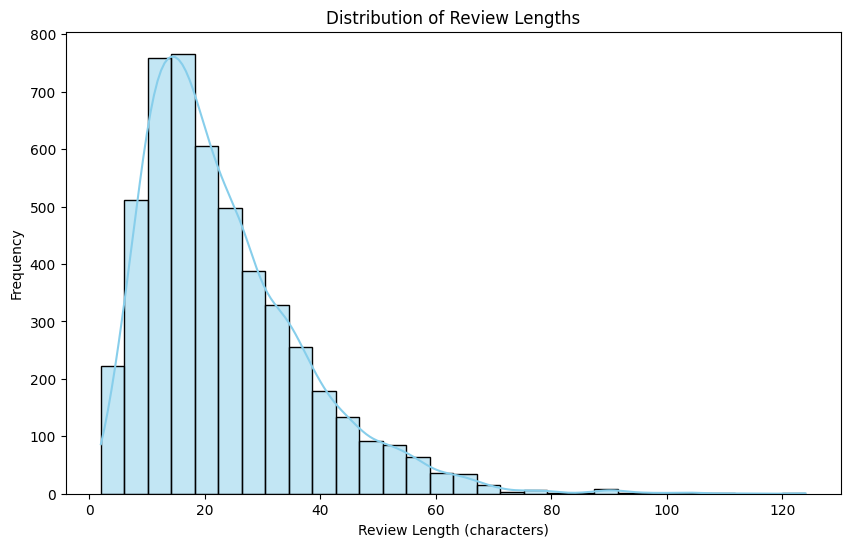

In [110]:
# Visualizing review text lengths
df['review_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()


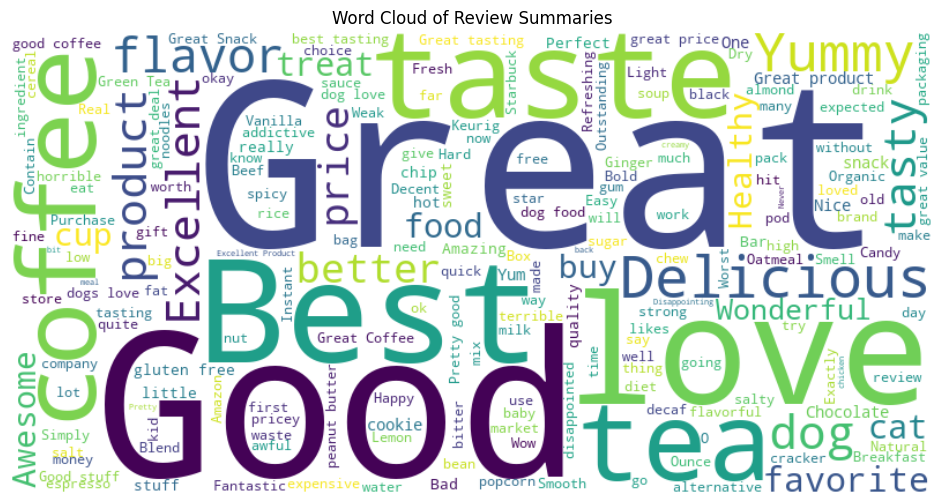

In [111]:
# Word cloud (if text-based)
from wordcloud import WordCloud

text = " ".join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


C:\Users\Tshiamo\AppData\Local\Temp\ipykernel_4688\4010540876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


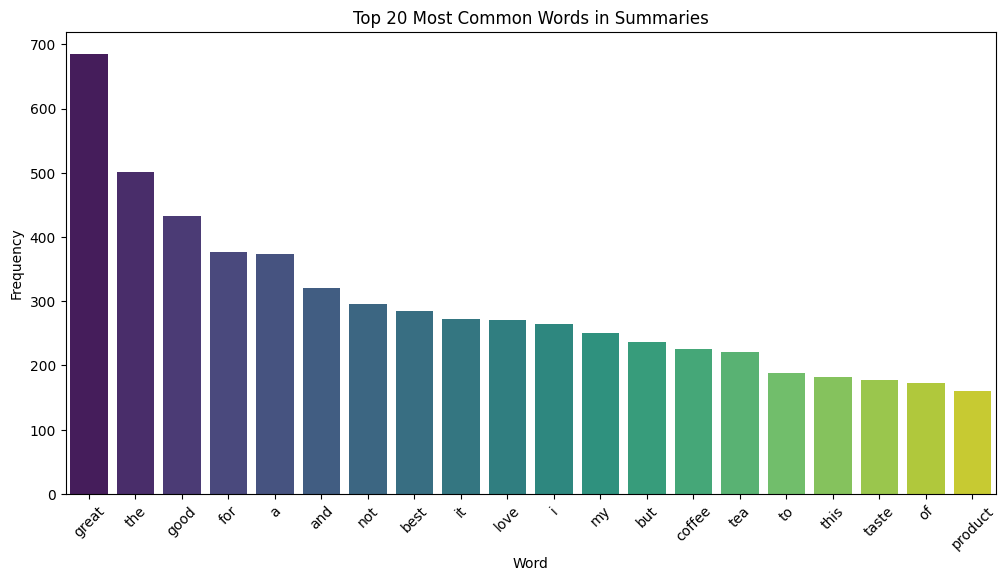

In [112]:
# Top 20 most common words (basic frequency count)
from collections import Counter
import re

words = []
for summary in df['Summary']:
    words += re.findall(r'\b\w+\b', summary.lower())

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


C:\Users\Tshiamo\AppData\Local\Temp\ipykernel_4688\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


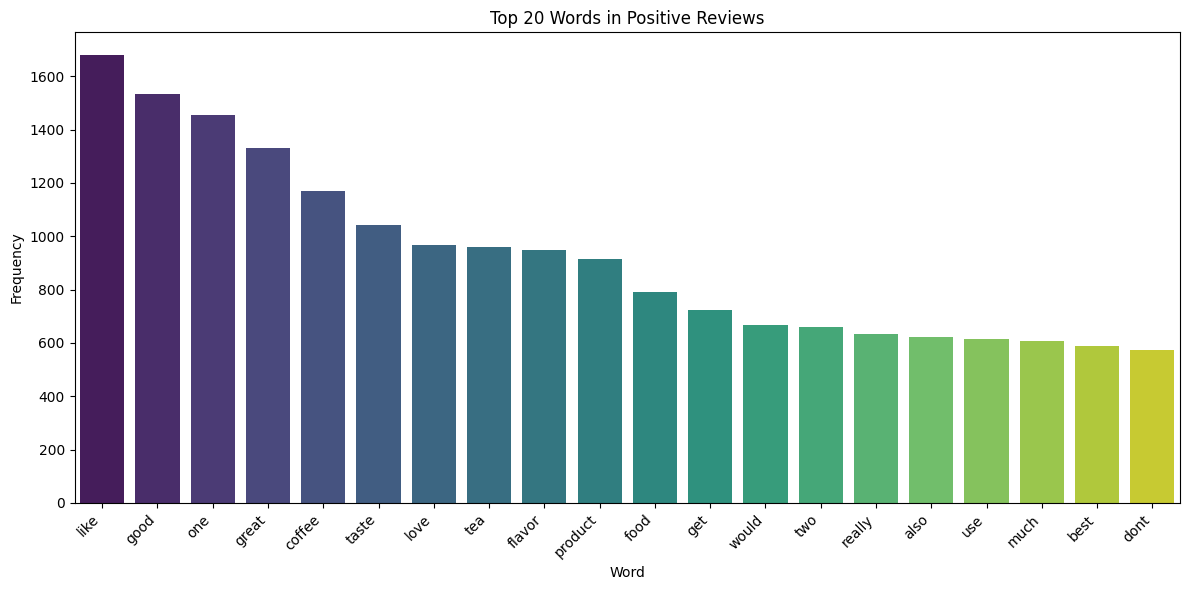

C:\Users\Tshiamo\AppData\Local\Temp\ipykernel_4688\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


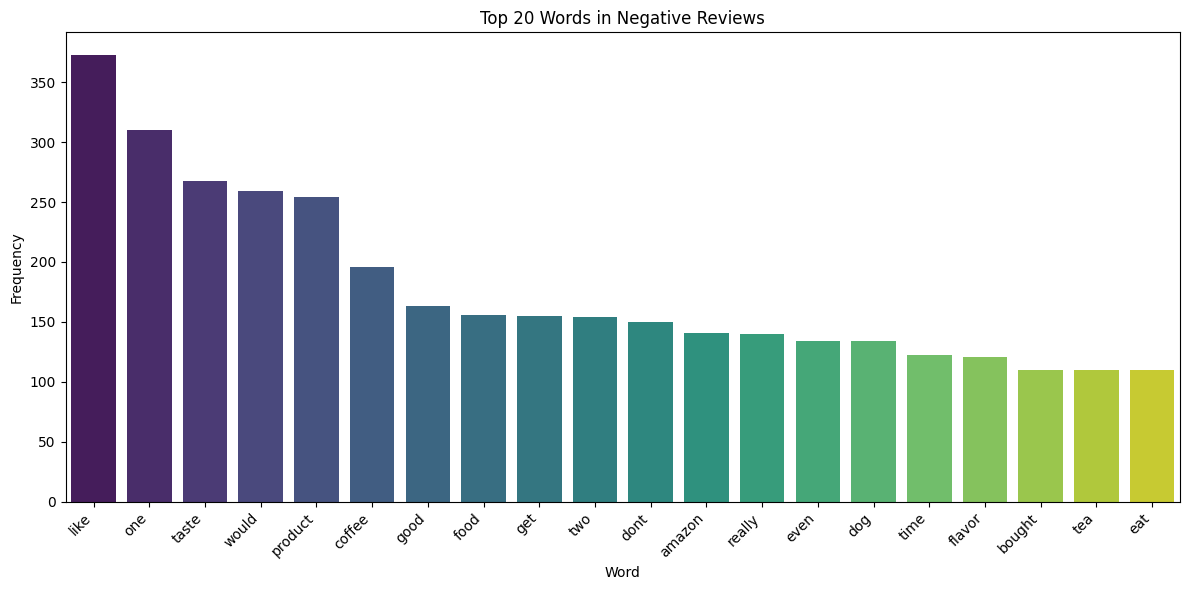

In [113]:
from collections import Counter

# Function to count word frequencies and display a bar graph
def word_frequency_graph(text_column, title="Top 20 Most Common Words", top_n=20):
    all_words = ' '.join(text_column).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)

    words, freqs = zip(*common_words)  # Unzip words and frequencies

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjusting layout to prevent labels from overlapping
    plt.show()

# Get common words for positive and negative reviews and display graphs
positive_reviews = df[df['Sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['clean_review']

word_frequency_graph(positive_reviews, title="Top 20 Words in Positive Reviews")
word_frequency_graph(negative_reviews, title="Top 20 Words in Negative Reviews")

C:\Users\Tshiamo\AppData\Local\Temp\ipykernel_4688\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


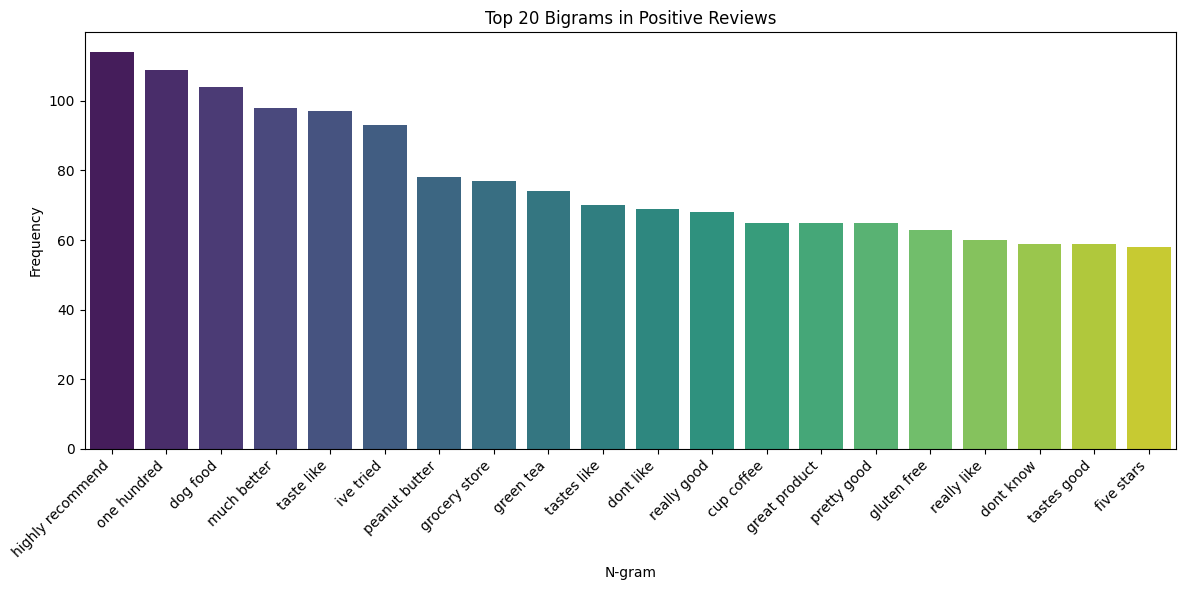

C:\Users\Tshiamo\AppData\Local\Temp\ipykernel_4688\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


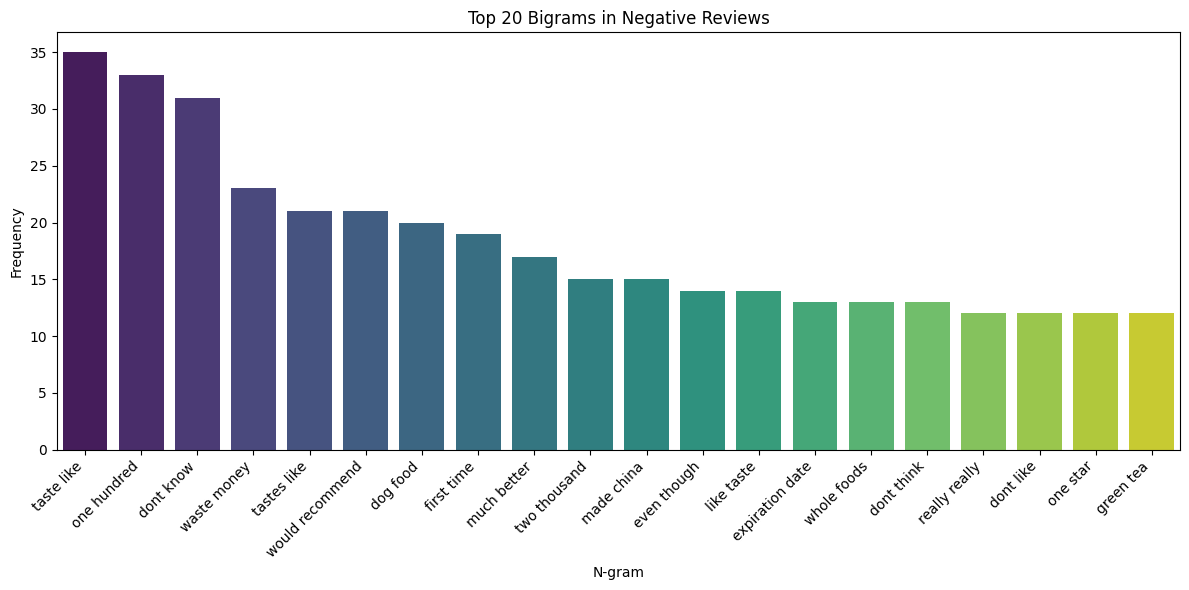

In [114]:
from nltk.util import ngrams

# Function to generate n-grams, count frequencies, and display a bar graph
def n_gram_frequency_graph(text_column, n=2, title=f"Top 20 Bigrams", top_n=20):
    n_grams = []
    for text in text_column:
        words = text.split()
        n_grams.extend(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    common_n_grams = n_gram_counts.most_common(top_n)

    # Convert n-grams to strings for plotting
    ngrams_strings = [" ".join(ngram) for ngram in dict(common_n_grams).keys()]
    freqs = list(dict(common_n_grams).values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Get common bigrams (2-word phrases) and display graphs
positive_bigrams = df[df['Sentiment'] == 'positive']['clean_review']
negative_bigrams = df[df['Sentiment'] == 'negative']['clean_review']

n_gram_frequency_graph(positive_bigrams, n=2, title="Top 20 Bigrams in Positive Reviews")
n_gram_frequency_graph(negative_bigrams, n=2, title="Top 20 Bigrams in Negative Reviews")

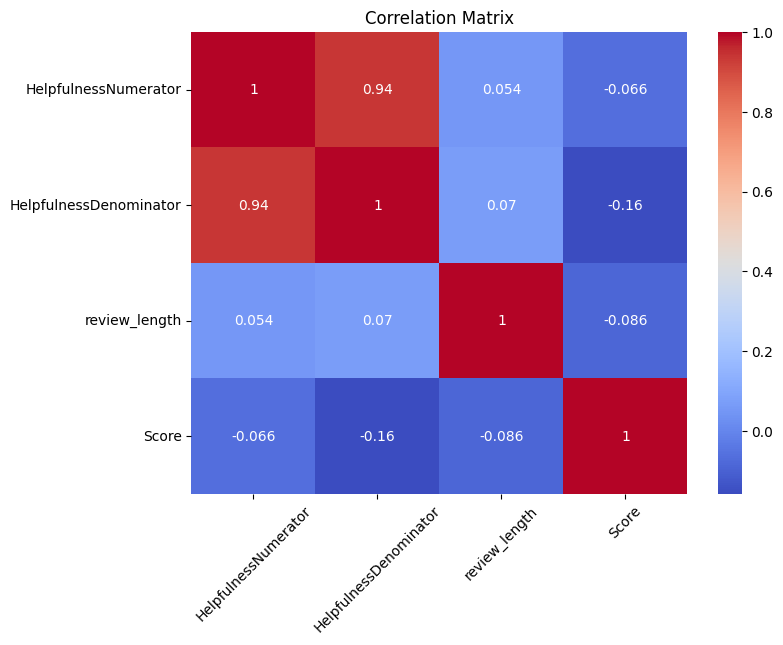

In [115]:
# Calculate the correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'review_length', 'Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

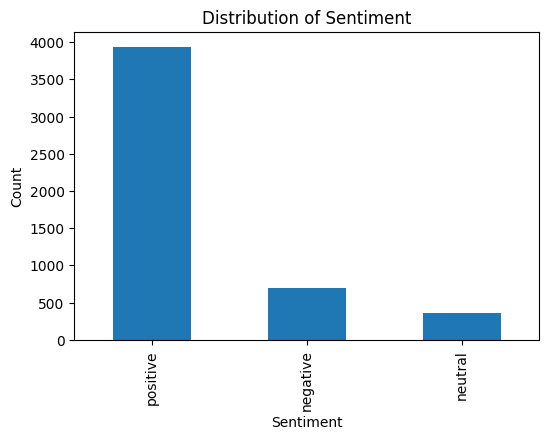

In [116]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Word Cloud for Positive Reviews


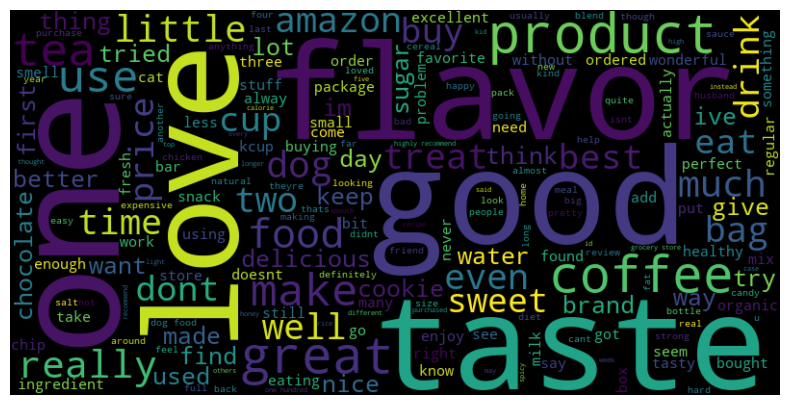

Word Cloud for Negative Reviews


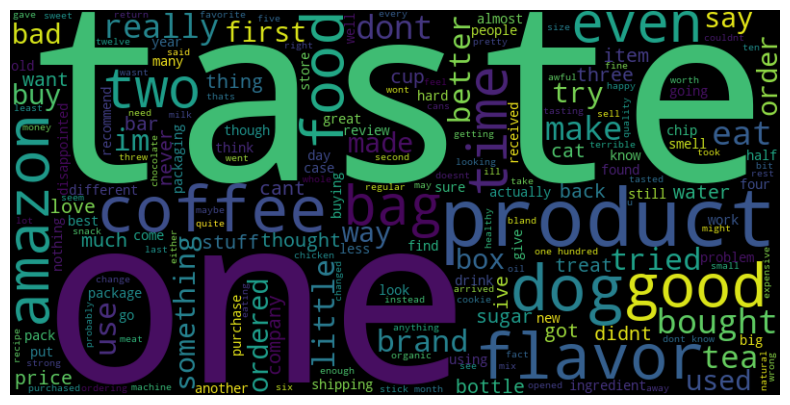

In [117]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text_column):
    text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative reviews
print("Word Cloud for Positive Reviews")
generate_word_cloud(positive_reviews)

print("Word Cloud for Negative Reviews")
generate_word_cloud(negative_reviews)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # For one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping # For early stopping
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 1. Data Preparation

# Tokenization and Padding (as before)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')

# One-hot encode the target variable (multi-class)
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Sentiment_Label'])  # shape: (num_samples, num_classes)
# Convert to numpy array
y = np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_balanced = X_train_resampled
y_train_balanced = y_train_resampled

# 2. Model Architecture (Multi-class)

def create_model(vocab_size, embedding_dim, max_length, num_classes):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(64, return_sequences=True), # Increased LSTM units
        LSTM(32),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # softmax for multi-class
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # categorical_crossentropy
                  metrics=['accuracy'])
    return model

vocab_size = 10000
embedding_dim = 32
max_length = 200
num_classes = y.shape[1] # Get number of classes from y

model = create_model(vocab_size, embedding_dim, max_length, num_classes)

# 3. Training the Model

model.summary()

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Stop if val_loss doesn't improve for 3 epochs

history = model.fit(X_train, y_train,
                    epochs=20, # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


c:\Users\Tshiamo\OneDrive\Documents\CYO-Project\CYOvenv310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 209ms/step - accuracy: 0.7672 - loss: 0.7736 - val_accuracy: 0.7810 - val_loss: 0.6597
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.8073 - loss: 0.5947 - val_accuracy: 0.8550 - val_loss: 0.4288
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8923 - loss: 0.3000

In [119]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# print(classification_report(y_true_classes, y_pred_classes, target_names=label_binarizer.classes_))
# print(confusion_matrix(y_true_classes, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [120]:
label_map = {"negative": 0, "neutral": 1, "positive": 2}
 
encoded_labels = [label_map[label] for label in df['Sentiment']]
y = encoded_labels
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Summary'].values.astype('U'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeling

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) 

LogisticRegression()

In [123]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.819
              precision    recall  f1-score   support

           0       0.62      0.35      0.45       149
           1       0.54      0.10      0.17        70
           2       0.84      0.97      0.90       781

    accuracy                           0.82      1000
   macro avg       0.67      0.47      0.51      1000
weighted avg       0.79      0.82      0.78      1000



# XGBoost Modeling

In [ ]:
from xgboost import XGBClassifier


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

# Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

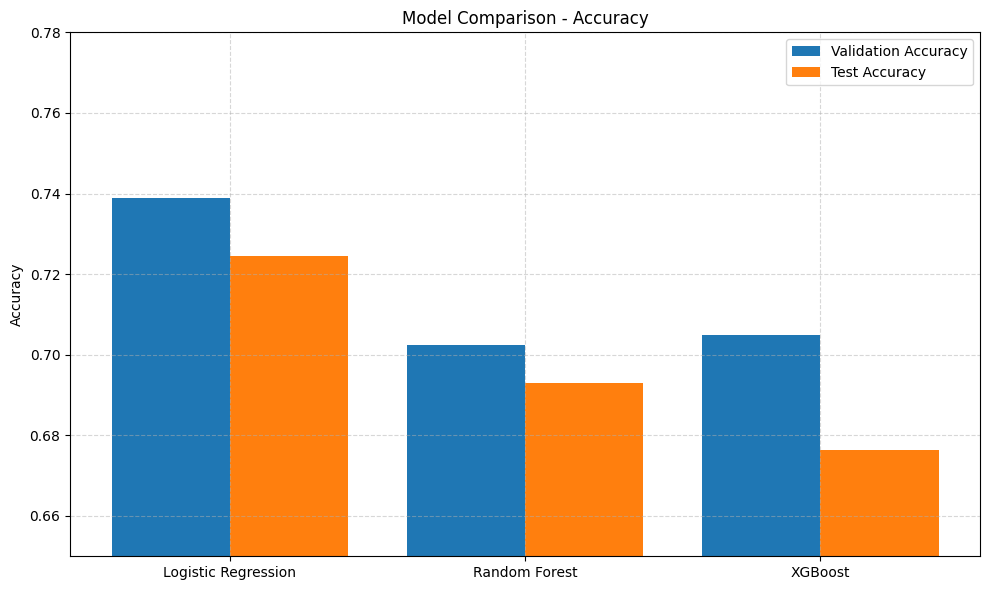

In [128]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

val_accuracies = [0.7389, 0.7023, 0.7050]
test_accuracies = [0.7244, 0.6931, 0.6764]


x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0.65, 0.78)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()